In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt

## Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

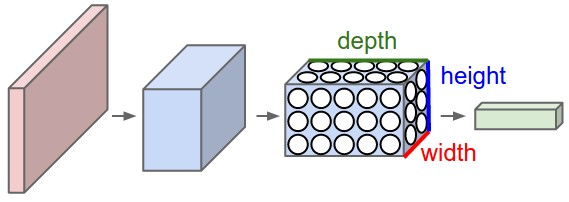

In [2]:
Image("/content/cnn2.jpeg")

### Why another type of Networks?
Problem with Multilayer Perceptrons(MLP's)

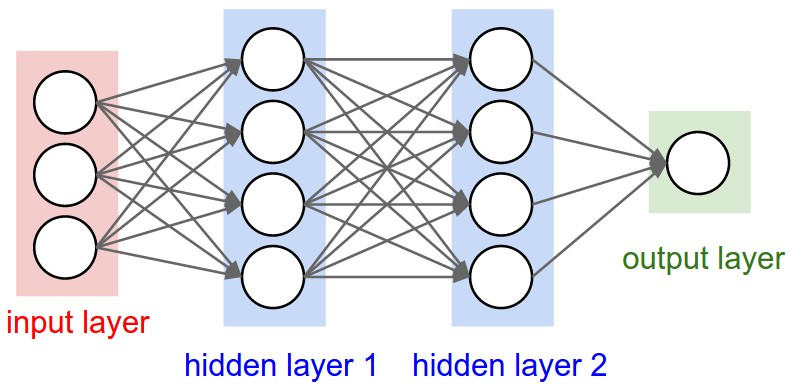

In [3]:
Image("/content/cnn.jpeg")

- **Overfitting** due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!        

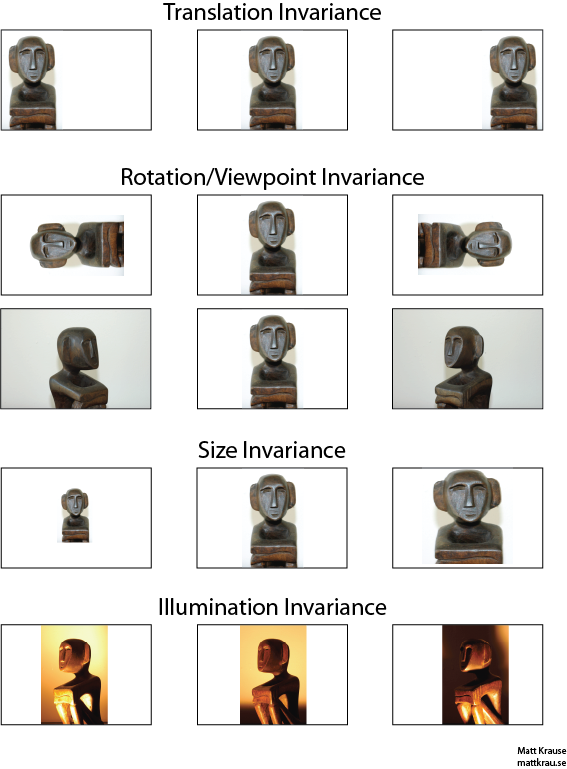

In [4]:
Image("/content/invariance.png")

### Why CNN's are special?

Let's have a look out this image!

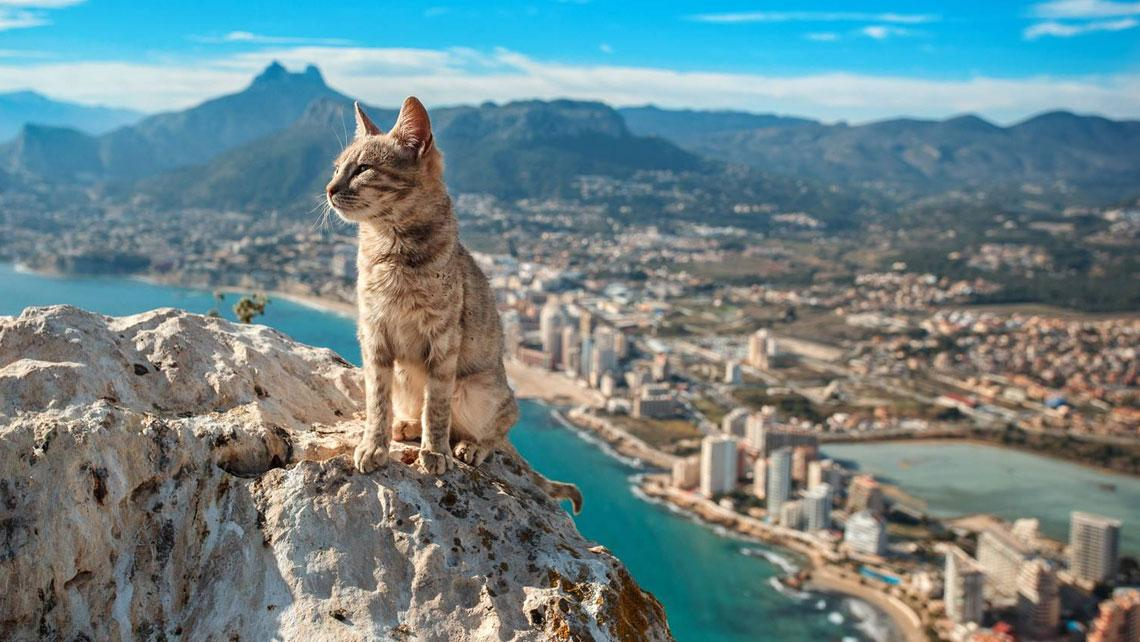

In [5]:
Image("cat.jpg", width= 700)

CNN know's this is a cat.

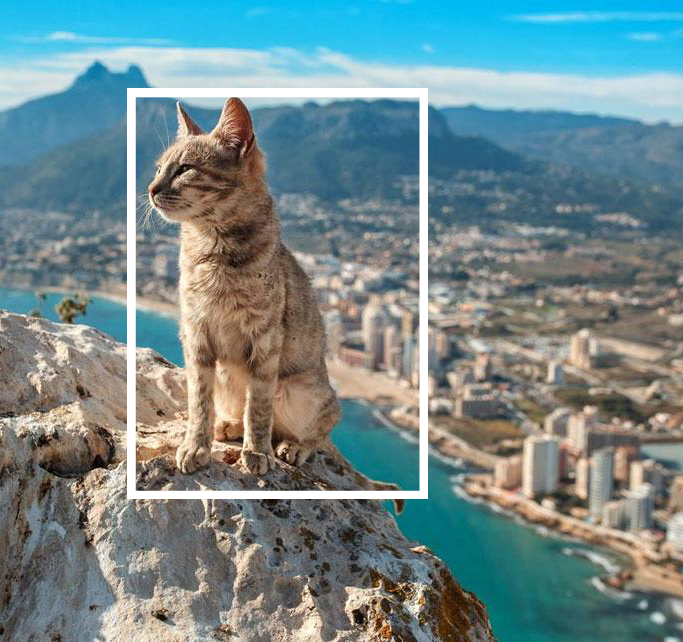

In [6]:
Image("cat1.jpg", width= 700, height= 500)

Even this is a cat.

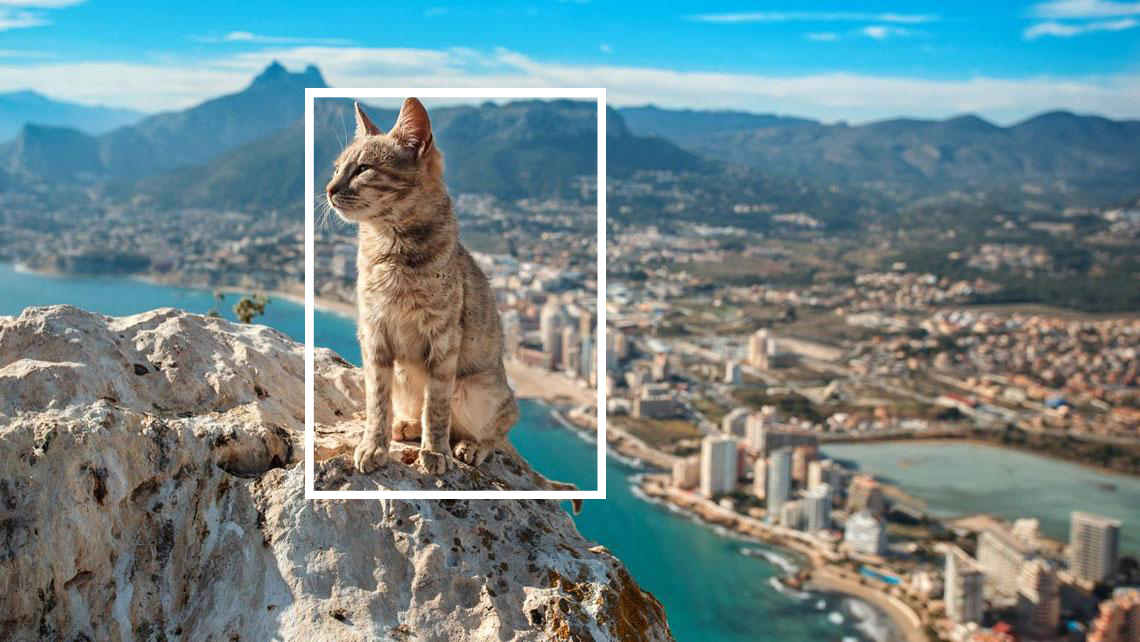

In [7]:
Image("cat2.jpg", width=700)

This a cat too.

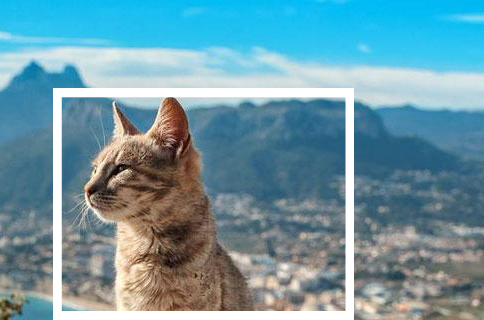

In [8]:
Image("cat3.jpg")

and this too!


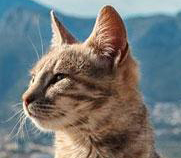

In [9]:
Image("cat4.jpg")

## How does it happen? It's like Template Matching!

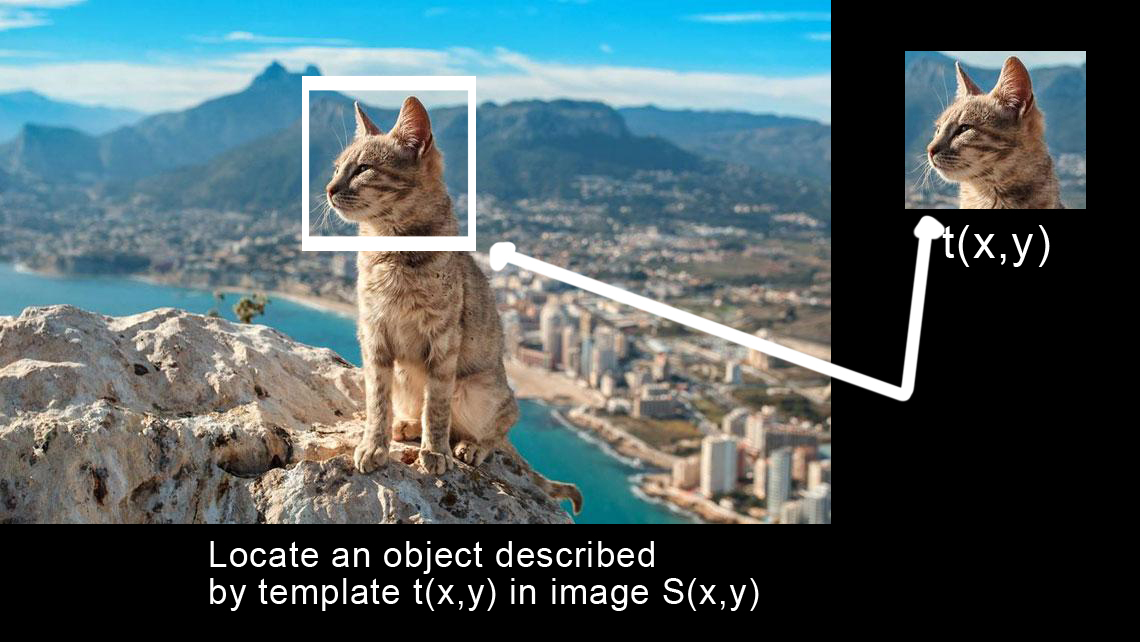

In [10]:
Image("conv.jpg", width=700)

### Let's understand Convolution

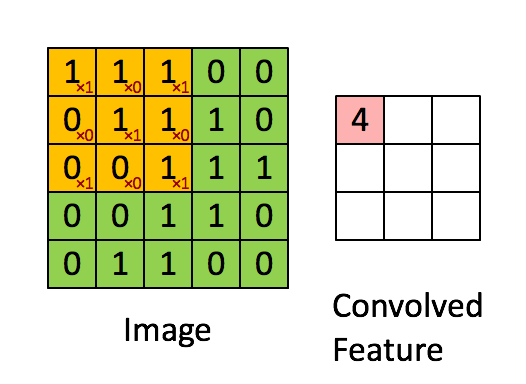

In [ ]:
Image(open('Convolution_schematic.gif','rb').read())

## Convolution layer?
- Convolution Layers are made up of filters
- but what are these filters?


### Code Example
Let's go through one code example 
to understand "Filters" and "Convolution"

When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [11]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
#function for drawing image
def drawImg(img, color = False):
    if color :
        plt.imshow(img)
    else:
        plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()

(100, 100, 3)


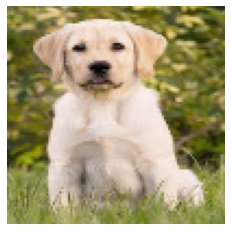

(100, 100)


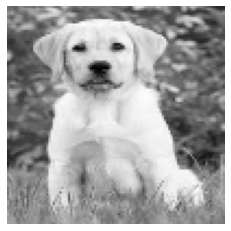

In [23]:
#importing images
img = cv2.imread('/content/download.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (100, 100))
print(img.shape)
drawImg(img, True)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img_gray.shape)
drawImg(img_gray, False)

In [30]:
def convolution(img, img_filter):
    H = img.shape[0]
    W = img.shape[1]
    F = img_filter.shape[0]
    new_img = np.zeros((H-F+1, W-F+1))

    for row in range(H-F+1): 
        for col in range(W-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]

                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0 :
                    new_img[row][col] = 0

    return new_img

In [31]:
#blur
blur_filter = np.ones((3,3))/9.0
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


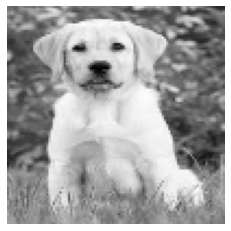

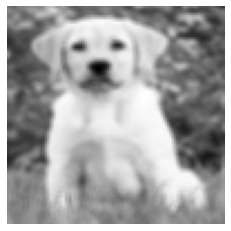

In [34]:
xyz = convolution(img_gray, blur_filter)
drawImg(img_gray)
drawImg(xyz)

In [35]:
#edge
edge_filter = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]]
                       )
edge_filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

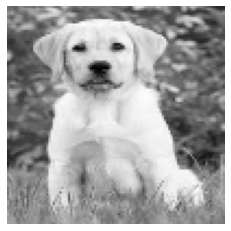

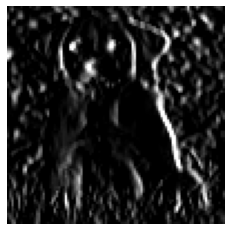

In [36]:
output = convolution(img_gray, edge_filter)
drawImg(img_gray)
drawImg(output)

(100, 100, 3)


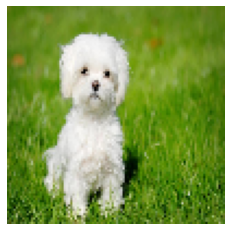

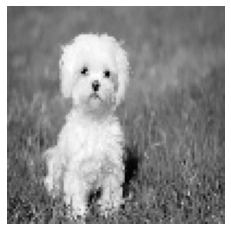

In [38]:
#importing images
img = cv2.imread('/content/XYZ.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (100, 100))
print(img.shape)
drawImg(img, True)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
drawImg(img_gray)

In [39]:
out1 = convolution(img_gray, blur_filter)
out2 = convolution(img_gray, edge_filter) 

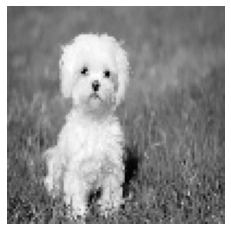

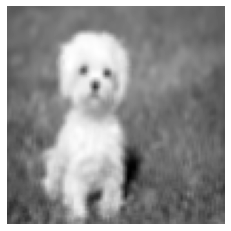

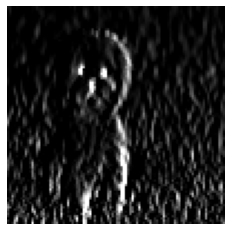

In [40]:
drawImg(img_gray)
drawImg(out1)
drawImg(out2)

 So Filters can highlight "Features" that can  be useful to classify images. Color is not always important, features like edges help in detecting objects!

### Buzzwords in CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling (Average/Maxpooling)

### Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride
- In our example we used a stride of (1,1) along W and H
- You can also use a stride of (2,2) in that case the output volume will have less W and H

**Input and Output Sizes**:
(assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$


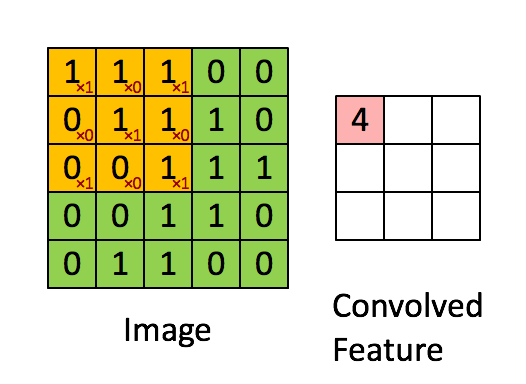

In [41]:
Image(open('Convolution_schematic.gif','rb').read())

### Padding
- Convolution operation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding

**Input and Output Sizes after Convolution**:
(with padding)



$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

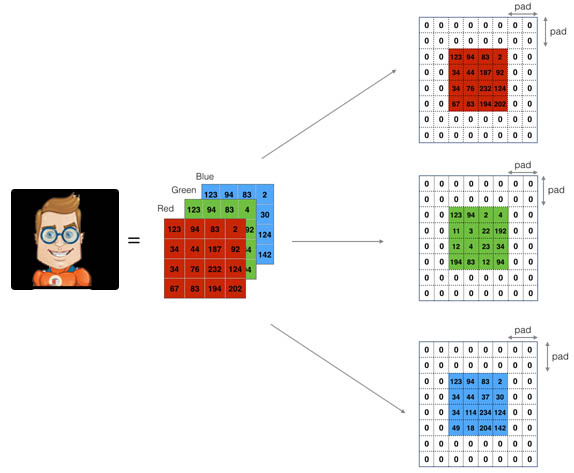

In [43]:
Image("cody_pad.jpg")

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- **Max-pooling layer**: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- **Average-pooling layer**: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size.


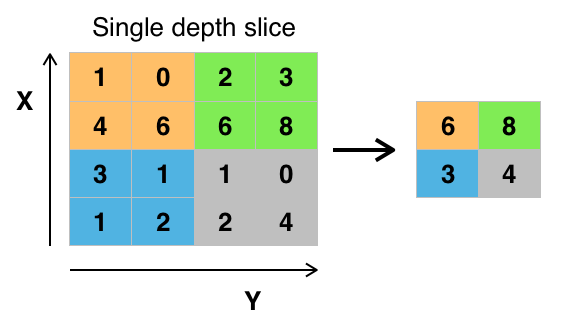

In [ ]:
Image("mp.png")

## General CNN Architecture

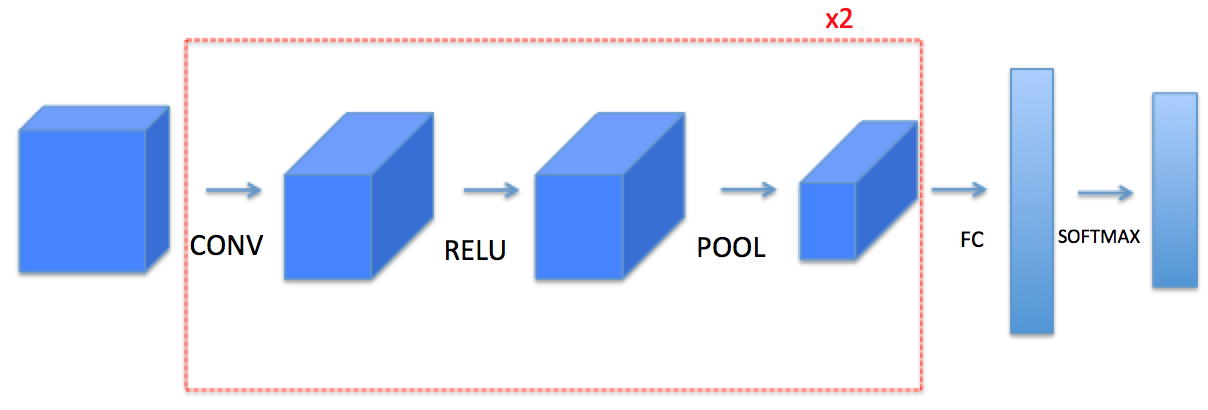

In [ ]:
Image("arch.png")

# [Conv Layers--> ReLu--->Pooling] --> FC -->Softmax
